In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import math
from scipy import signal

## Simulations

In [2]:
def ensembleAverage(epoch,numEpochs):
    return(np.mean(epoch[0:numEpochs],axis=0))

def normalise(x):
    return (x - np.mean(x)) / (np.max(x)-np.min(x))

Text(0, 0.5, 'Amplitude')

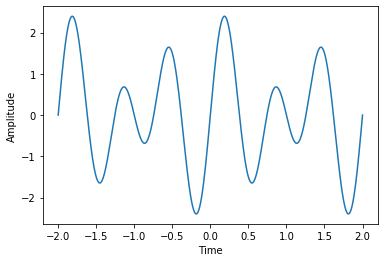

In [3]:
# generating a sinus signal

T=2
Nt=5000
t=np.linspace(-T,T,Nt)
signal=np.sin(2*np.pi*1*t)+1.5*np.sin(2*np.pi*1.50*t)
plt.plot(t,signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

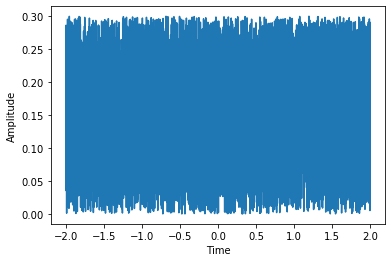

In [4]:
#white noise
noise=np.random.uniform(0,1,Nt)*0.3
plt.plot(t,noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

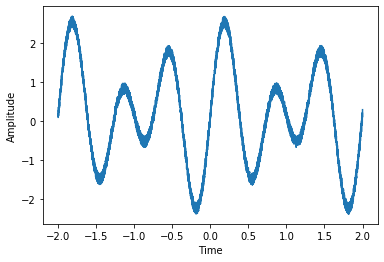

In [5]:
newSignal=signal + noise
plt.plot(t,newSignal)
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [6]:
#Creating 200 samples of signal superimposed with random noise
samples=[]
for i in range(0,200):
    noise=np.random.normal(0,1,Nt)*0.3
    samples.append(signal+noise)

Text(0, 0.5, 'Amplitude')

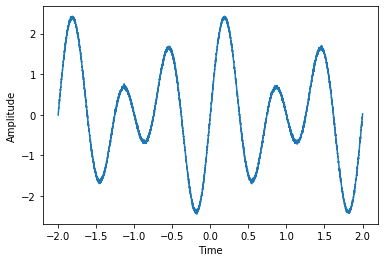

In [7]:
#Ensemble averaging to get the original signal
ensembledOutput=ensembleAverage(samples,200)
plt.plot(t,ensembledOutput)
plt.xlabel('Time')
plt.ylabel('Amplitude')

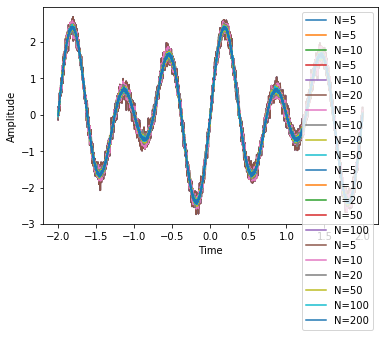

In [8]:
#Number of epochs affecting the quality of the retrieved signal
sample_nums=[5,10,20,50,100,200]
ensemble_averages=[]
for i in sample_nums:
    ensemble_averages.append(ensembleAverage(samples,i))
    for i in range(len(ensemble_averages)):
        plt.plot(t,ensemble_averages[i],label='N='+str(sample_nums[i]))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

We can see that there is lower jitter for more epochs

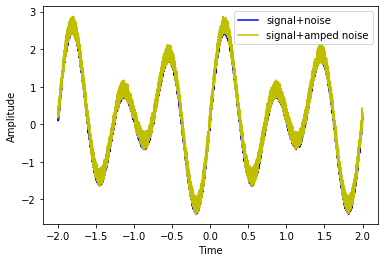

In [9]:
#Increasing the whitenoise amplitude and ensemble averaging
ampedNoise=np.random.uniform(0,1,Nt)*0.5
signal2=signal+ampedNoise
plt.plot(t,newSignal,'b',label='signal+noise')
plt.plot(t,signal2,'y',label='signal+amped noise')
#plt.plot(t,signal,label='signal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

Text(0, 0.5, 'Amplitude')

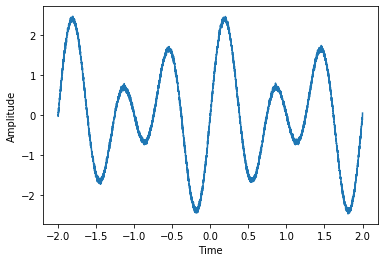

In [10]:
samples2=[]
for i in range(0,200):
    noise=np.random.normal(0,1,Nt)*0.5
    samples2.append(signal+noise)
    ensemble2=ensembleAverage(samples2,200)
plt.plot(t,ensemble2)
plt.xlabel('Time')
plt.ylabel('Amplitude')

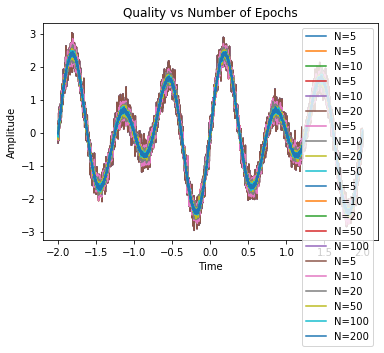

In [11]:
ensemble_averages2=[]
for i in sample_nums:
    ensemble_averages2.append(ensembleAverage(samples2,i))
    for i in range(len(ensemble_averages2)):
        plt.plot(t,ensemble_averages2[i],label='N='+str(sample_nums[i]))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Quality vs Number of Epochs')
plt.legend()

/home/saqib/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


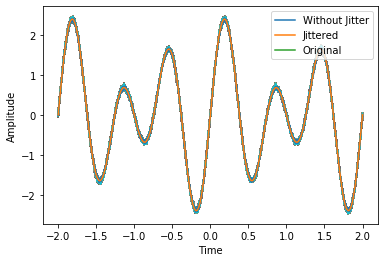

In [12]:
#Introducing latency jitter in each epoch
jittered_samples=[]
for i in range(len(samples)):
    jittered_samples.append(np.roll(samples[i],np.random.randint(low=-30,high=30)))
    jittered_ensemble=ensembleAverage(jittered_samples,200)
    plt.plot(t,ensemble2)
plt.plot(t,jittered_ensemble)
plt.plot(t,signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(['Without Jitter','Jittered','Original'])

## Real Ep data

In [13]:
data=pd.read_csv('epData.csv')
data=data.to_numpy()


In [14]:
data.shape
data=np.pad(data,((0,1),(0,0)),mode='constant',constant_values=0)
data.shape

(512000, 1)

Text(0, 0.5, 'amplitude')

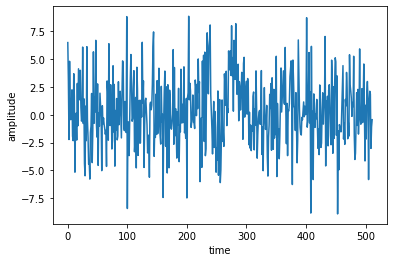

In [15]:
plt.plot(data[:512])
plt.xlabel('time')
plt.ylabel('amplitude')

From the above plot we cant directly infer anything as no clear trends are visble

In [34]:
#spiltting the signal into epochs of 160ms
fs = 3200
interval =160e-3
time = np.arange(0, interval, 1/fs)
numSamples = data.shape[0]/time.shape[0]
sampledData = []
for i in range(0,1000):
    sampledData.append(data[i*len(time):(i+1)*len(time)])
epochs =np.array(sampledData, dtype=np.float32)
epochs=epochs.reshape([1000,512])
epochs.shape

(1000, 512)

No handles with labels found to put in legend.


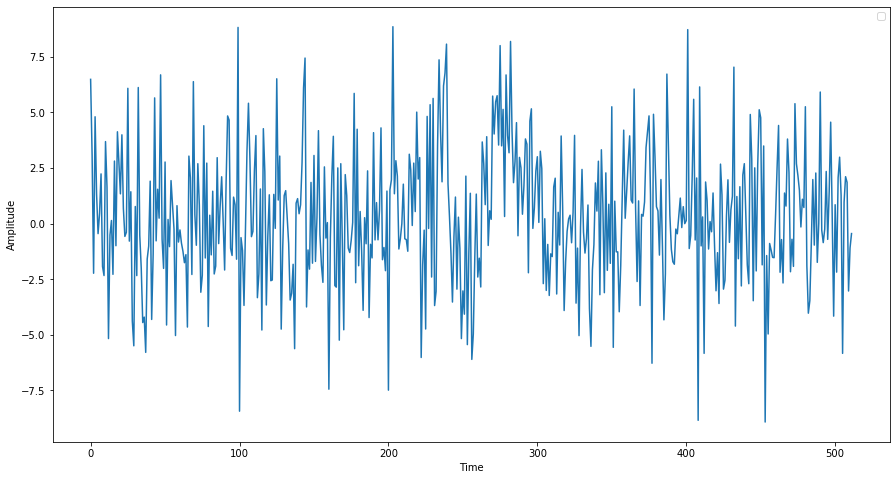

In [35]:
plt.figure(figsize=(15,8))
plt.plot(epochs[0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

No handles with labels found to put in legend.


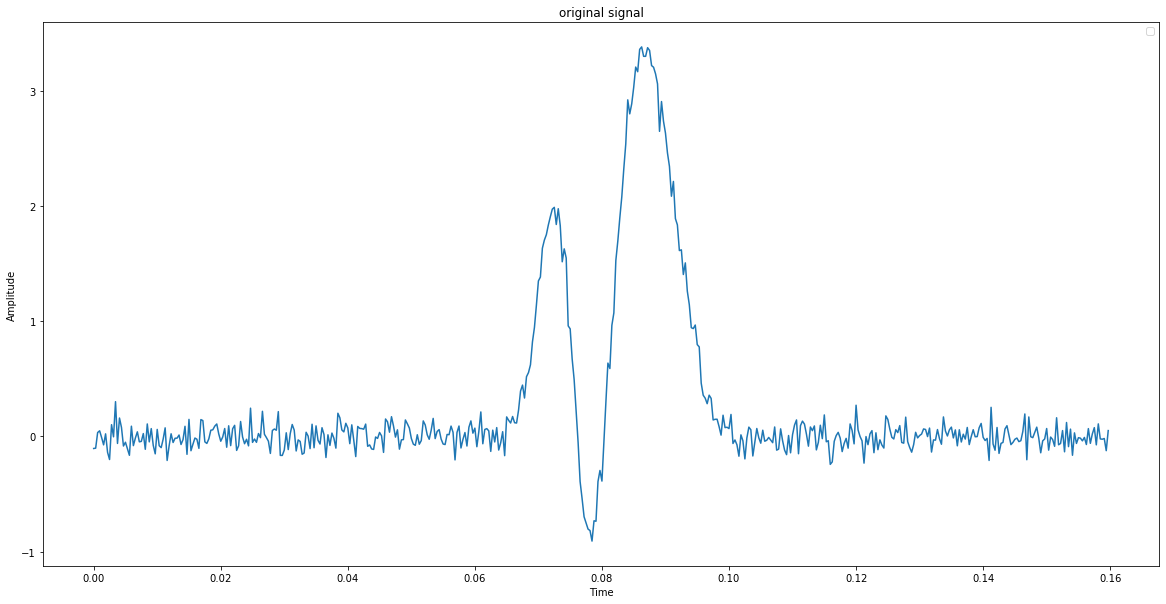

In [36]:
plt.figure(figsize= (20, 10))
plt.plot(time,ensembleAverage(sampledData,1000))
plt.title('original signal')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

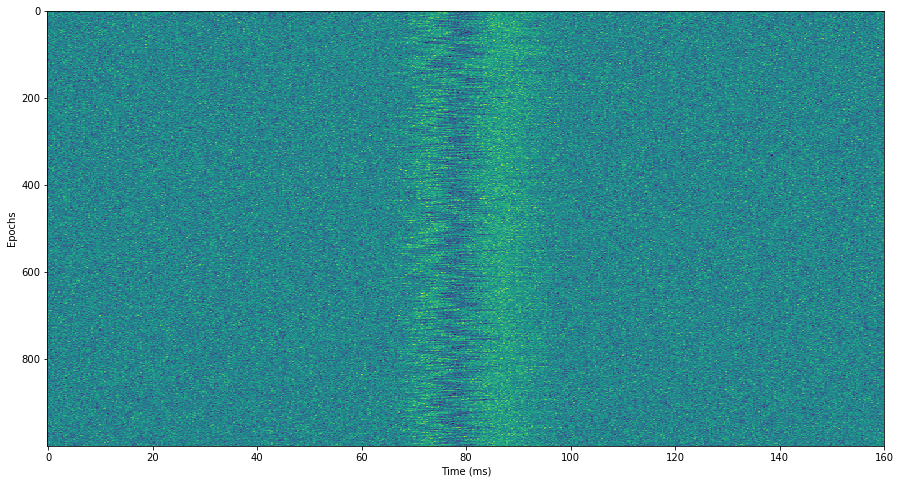

In [37]:
plt.figure(figsize= (15,8))
plt.imshow(epochs,aspect='auto')
plt.axis('on')
plt.ylabel('Epochs')
plt.xlabel('Time (ms)')
plt.xticks([0,64,128,192,256,320,384,448,512],labels=['0','20','40','60','80','100','120','140','160'])
plt.show()

Here we can see signal activity at 80ms for all the epochs

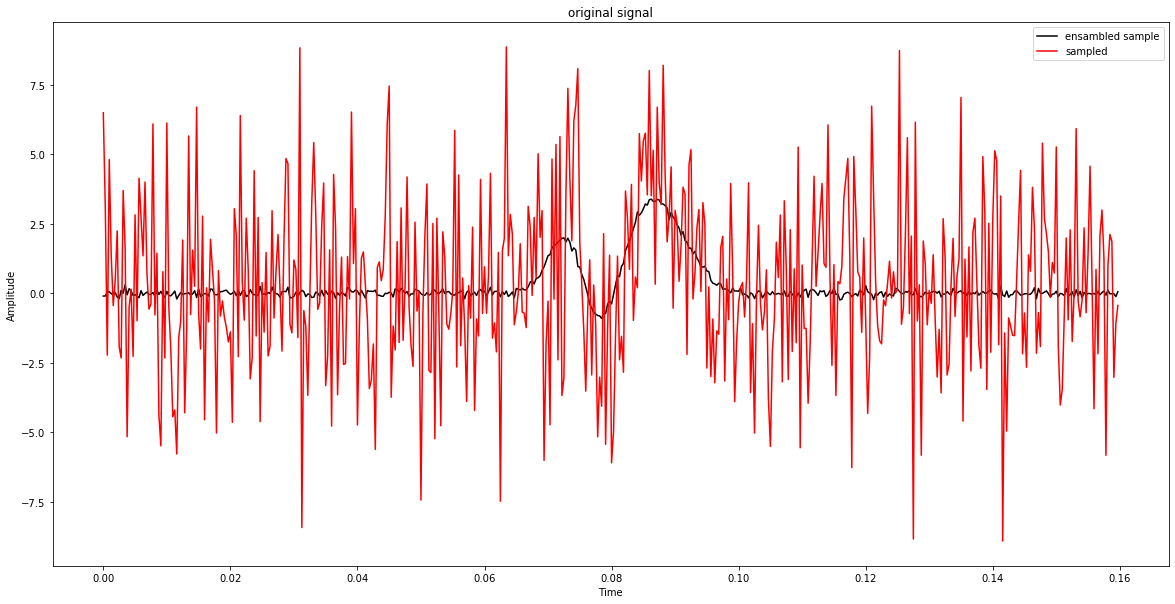

In [39]:
plt.figure(figsize= (20, 10))
plt.plot(time,ensembleAverage(sampledData,1000),'black',label='ensambled sample')
plt.plot(time,sampledData[0],'red',label='sampled')
plt.title('original signal')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

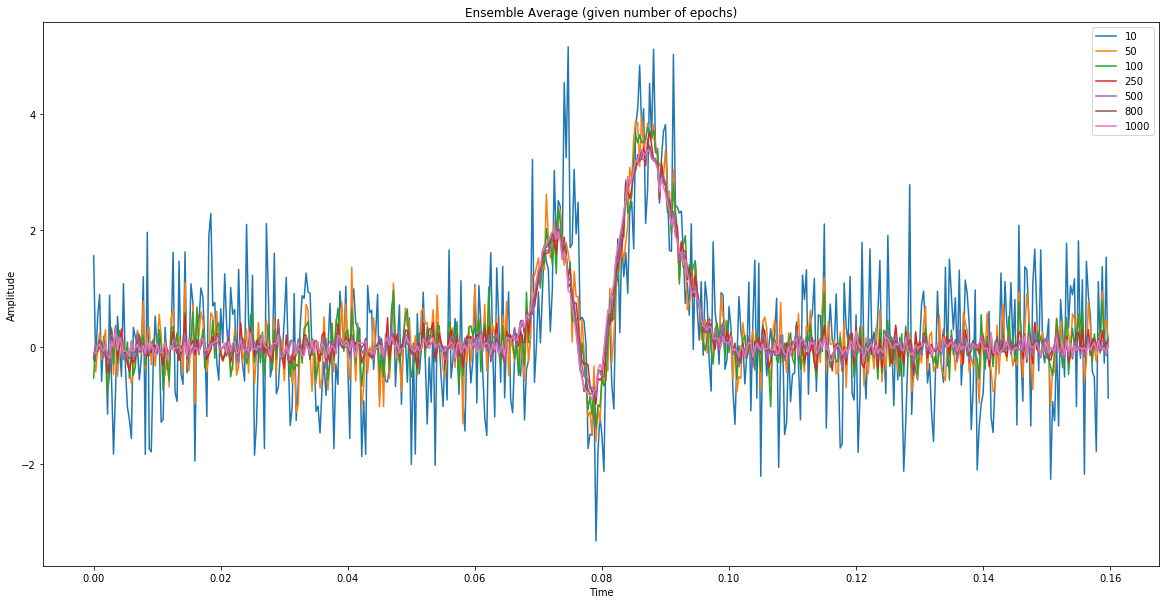

In [40]:
num_epoch = [10, 50, 100, 250, 500, 800, 1000]
plt.figure(figsize= (20, 10))
for i in range(0, len(num_epoch)):
    plt.plot(time, ensembleAverage(epochs, num_epoch[i]),label=str(num_epoch[i]))
plt.legend()
plt.title("Ensemble Average (given number of epochs)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

We can see that, like earlier, the quality of the signal increases with the number of samples

# PDF's

In [48]:
noise_samples = []
ensembled_average_signal = ensembleAverage(epochs, 1000)
for i in range(0,1000):
    noise_samples.append(epochs[i]-ensembled_average_signal)
#print(len(noise_samples))

original_signal_samples = []
for i in range(len(noise_samples)):
    original_signal_samples.append(epochs[i]-noise_samples[i])
#print(len(original_signal_samples))



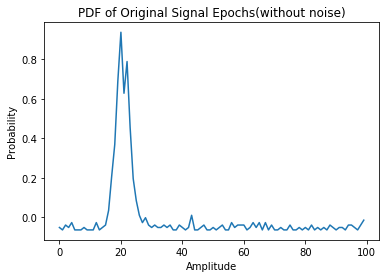

In [51]:
n1,bins=np.histogram((np.array(original_signal_samples).flatten()),bins=100)
plt.plot(normalise(n1))
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.title('PDF of Original Signal Epochs(without noise)')
plt.show()

Text(0.5, 1.0, 'PDF of Noise Signal Epochs(without signal)')

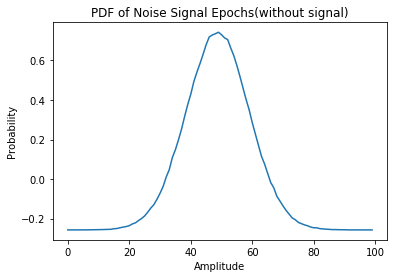

In [52]:
n2,bins=np.histogram((np.array(noise_samples).flatten()),bins=100)
plt.plot(normalise(n2))
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.title('PDF of Noise Signal Epochs(without signal)')

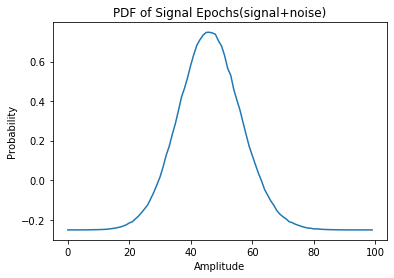

In [54]:
n3,bins=np.histogram((np.array(epochs).flatten()),bins=100)
plt.plot(normalise(n3))
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.title('PDF of Signal Epochs(signal+noise)')
plt.show()

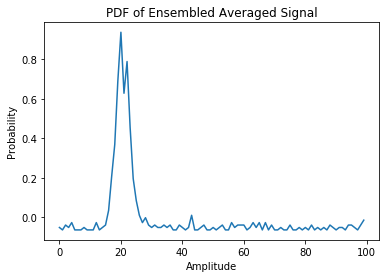

In [55]:
n4,bins=np.histogram((np.array(ensembled_average_signal).flatten()),bins=100)
plt.plot(normalise(n4))
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.title('PDF of Ensembled Averaged Signal')
plt.show()

We can clearly see that the signal epochs (signal + noise) are affected by the noise content while the ensemble averaged signal contains very less noise and is more like the original signal(without noise)